### **1. Data Collection**

In [ ]:
#import essential library to load dataset
import pandas as pd
#importing the dataset
train_dataset = pd.read_csv('./dataset/train_salary.csv')
test_dataset = pd.read_csv('./dataset/test_salary.csv')
#copy of training dataset excluding the last column
train_input = train_dataset.iloc[:, :-1].values
#copy of last column from training dataset
train_output = train_dataset.iloc[:, -1].values
#copy of testing dataset excluding the last column
test_input = test_dataset.iloc[:, :-1].values
#copy of last column from testing dataset
test_output = test_dataset.iloc[:, -1].values

### **2. Model/hypothesis represenation**

In [3]:
def hypothesis(train_input, parameter):
  pred_output = [ ]
  for i in range(len(train_input)):#iterate through all the samples
    output_inter = parameter[0] # calculate theta0*x0 (x0 value is 1)
    for n in range(train_input[0].size): #calculate the number of features
      output_inter += parameter[n+1] * train_input[i][n] #calculate theta1*x1 + theta2*x2 .. . .thetan*xn
    pred_output.extend([output_inter])
  return pred_output

### **3. Cost function**

In [4]:
def cost(pred_output,train_output,m):
  error = (pred_output - train_output)
  mse_error = (1/(2*m)) * (error**2) #m is number of samples itself since it is batch gradient descent optimization
  return error,sum(mse_error) #error value is for parameter updation and mse_error is to measure the average error at every epoch

### **4. Optimization of model parameters**

In [5]:
def gradient_descent(error,parameters,learning_rate,input,m):
  parameters[0] = parameters[0] - (learning_rate * (sum(error)/len(input))) #update theta0 against all the input samples
  for n in range(input[0].size):
    interim = 0
    for m in range(len(input)):
      interim += error[m] * input[m][n]
    interim /= len(input)
    parameters[n + 1] = parameters[n + 1] - (learning_rate * interim) #update theta1, theta2, , ,, depending upon the number of features
  return parameters

### **5. Batch gradient descent:**

In [6]:
def optimization(train_input,train_output,test_input,test_output,learning_rate,parameters,epochs,m):
  best_error = 9999999999999999
  test_error = 0
  for epoch in range(epochs):
    error = 0
    pred_output = hypothesis(train_input,parameters) #calculate output with present value of parameters
    error,mse_error = cost(pred_output,train_output,m) #calculate error between predicted output and actual output
    parameters = gradient_descent(error,parameters,learning_rate,train_input,m) # use the error to update the model parameters
    train_error_list.append(mse_error) #append the mse_error for graph plot
    test_error = test_model(test_input,test_output,parameters,m) #calculate test error
    test_error_list.append(test_error) #append the test error for graph plot
    if ((epoch+1)%2000==0):#print training progress after every 10 epochs and replace 10 by 1 to print progress after every epoch
      print("Epoch:",epoch+1, "Training error:",mse_error,"Testing error:",test_error, "Parameters:",parameters)
    if(best_error > test_error and test_error>=0.0): #copy the best values during the training from epoch 1 till last epoch
      best_error=test_error
      best_epoch=epoch+1
      best_parameters=parameters
  return best_error,best_epoch,best_parameters

### **6. Model testing**

In [7]:
def test_model(testing_input,testing_output,parameters,m):
  total_error = 0
  predicted_output = hypothesis(testing_input,parameters)#calculate the per sample predicted output
  error,mse_error = cost(predicted_output,testing_output,m)#calculate error for each testing sample
  total_error = (mse_error * m)/len(testing_input)
  return total_error

### **7. Model training**

In [8]:
epochs = 25000
learning_rate = 0.0005
parameters = [0.0 for i in range(len(train_input[0])+1)]
train_error_list = [ ]
test_error_list = [ ]
m = len(train_input)
best_error,best_epoch,best_parameters = optimization(train_input,train_output,test_input,test_output,learning_rate,parameters,epochs,m)
print("\n\n\n-----------------------------------------------------Training Finished-----------------------------------------------------\n")
print("The Best testing error:",best_error,"is at epoch:", best_epoch,"with parameters values",best_parameters)
print("\n---------------------------------------------------------------------------------------------------------------------------")

Epoch: 2000 Training error: 1.3110429361799907 Testing error: 1.827374132830728 Parameters: [1.2132432260231962, 9.610665072930354, 5.047833116391424, 8.45565665536054]
Epoch: 4000 Training error: 0.7826871855490842 Testing error: 1.426901337495973 Parameters: [1.1067663437978328, 9.501728531738069, 5.718663467725672, 8.362539172810171]
Epoch: 6000 Training error: 0.7159823332401899 Testing error: 1.3699671036461387 Parameters: [1.0131392299697488, 9.46643559737364, 5.944219340832607, 8.338425297489566]
Epoch: 8000 Training error: 0.7021150572734176 Testing error: 1.3536906412157972 Parameters: [0.927251677747022, 9.456250130890057, 6.0203222356506885, 8.336687507858423]
Epoch: 10000 Training error: 0.6949356709039468 Testing error: 1.3432063731782728 Parameters: [0.8472114648793407, 9.454393030551694, 6.046238902919347, 8.342080555911252]
Epoch: 12000 Training error: 0.6891600359474331 Testing error: 1.334206790313437 Parameters: [0.7721896063420418, 9.455238097233151, 6.0552887326544

### **8. Graph plots to visualize the training and testing errors**

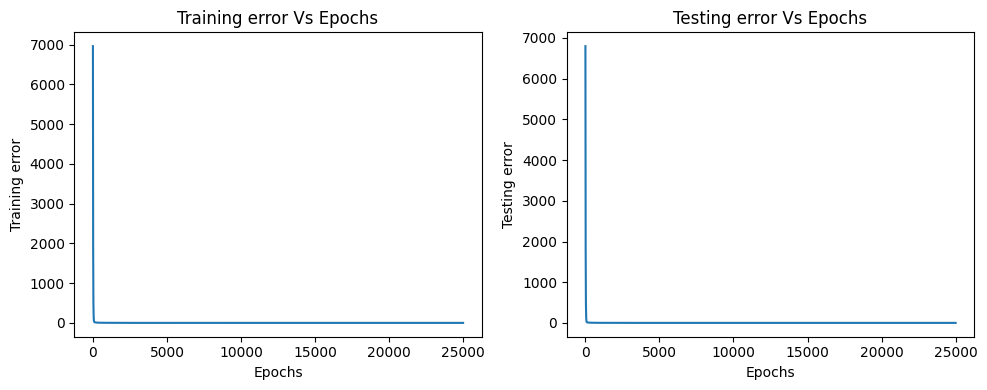

In [9]:
#import the library to plot the graph
import matplotlib.pyplot as plt
#copy the data for plotting
epochs_num = list(range(1, epochs+1))
x = epochs_num
y1 = train_error_list
y2 = test_error_list
#create a figure with subplots and specify figsize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#plot the first subplot for training and add legend and axis labels
axes[0].plot(x, y1)
axes[0].set_title('Training error Vs Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training error')
#plot the second subplot for testing and add legend and axis labels
axes[1].plot(x, y2)
axes[1].set_title('Testing error Vs Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Testing error')
plt.tight_layout()
#show the plots
plt.show()